In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import collections
import numpy as np

Choix du cas à analyser :

In [2]:
PATH = os.getcwd() + '\\output_methods'
algo = '\\lda'
ID = '\\1_1_1_eb_d7_04_a8_3' 

In [3]:
with open(PATH+algo+ID+'\\model.h5', 'rb') as file:
    model = pickle.load(file)

In [4]:
params = pd.read_pickle(os.getcwd()+ '\\func_config\\params')
params_line = params[params['id'] == ID.replace('\\', '')]
data = pd.read_pickle(os.getcwd() + params_line['data_path'].values[0])
nb_doc = len(data)

In [5]:
if algo == '\\kmeans'  or algo == '\\cah':
    labels = model.labels_.astype('U')
else :
    data_embedded = pd.read_pickle(os.getcwd() + params_line['embedding_path'].values[0])
    doc_topic = model.transform(data_embedded)
    labels = []
    for n in range(doc_topic.shape[0]):
        topic_most_pr = str(doc_topic[n].argmax())
        labels.append(topic_most_pr)

### Visualisation

C:\Users\MathildeElimas\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
C:\Users\MathildeElimas\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0.5, 0, 'topics')

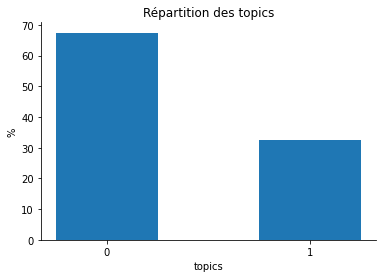

In [6]:
labels_freq = dict(sorted(collections.Counter(labels).items(), key=lambda t: t[1], reverse= True))
plot = plt.bar(list(labels_freq.keys()), np.array(list(labels_freq.values()))/nb_doc*100, width = 0.5)
plt.title('Répartition des topics')
plt.axes().spines['right'].set_color('none')
plt.axes().spines['top'].set_color('none')
plt.style.use('default')
plt.ylabel('%')
plt.xlabel('topics')

In [7]:
np.array(list(labels_freq.values()))/nb_doc*100

array([67.4617737, 32.5382263])

In [8]:
### verbatim du groupe n 
n = 1
data['label'] = labels
list(data[data['label'] == str(n)].CommentBody)

["Bonjour je ne comprends pas ma facture de ce mois ci, vous m'avez débité de 14,99 au lieu de 11,99 € habituellement",
 'Bonjour, je suis nouveau client bbox. Depuis l’installation je subis beaucoup de micro-coupures ce qui impacte énormément mon activité professionnelle. Pourriez-vous me recontacter svp. Merci Dr Maud Vivanti',
 "Intervention impensable...quel mauvais service ! Je suis coup de d'Internet et télé depuis installation fibre samedi qui ne marche pas. Qui peut me répondre...tout le monde me raccroche au nez ????",
 'Bonsoir , je viens de m apercevoir que vous avez changer mon offre sans mon accord.',
 'Explication Facture',
 "Bonjour j'aimerais désactivé B.tv mes je n'y arrive pas comment puis-je faire mci",
 'Pourquoi votre service box ne fonctionne pas ?',
 "Bonjour je n'ai pas demander de changer doffre pourquoi min abonnement a--il etait changé ? Je souhaite conserver min offre 20go à 4.99",
 'Bonsoir Je voulais savoir si c’était possible que je prenne un iPhone 11 av